In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
data= pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
def mean_scores(row):
    mean = (row['math score'] + row['reading score'] + row['writing score']) / 3
    return round(mean,2)

In [9]:
data['mean_score'] = data.apply(mean_scores, axis=1)

In [10]:
print('Math mean: ',data['math score'].mean(),
      'Reading mean: ',data['reading score'].mean(),'Writing mean:',data['writing score'].mean())

Math mean:  66.089 Reading mean:  69.169 Writing mean: 68.054


<Axes: xlabel='race/ethnicity', ylabel='mean_score'>

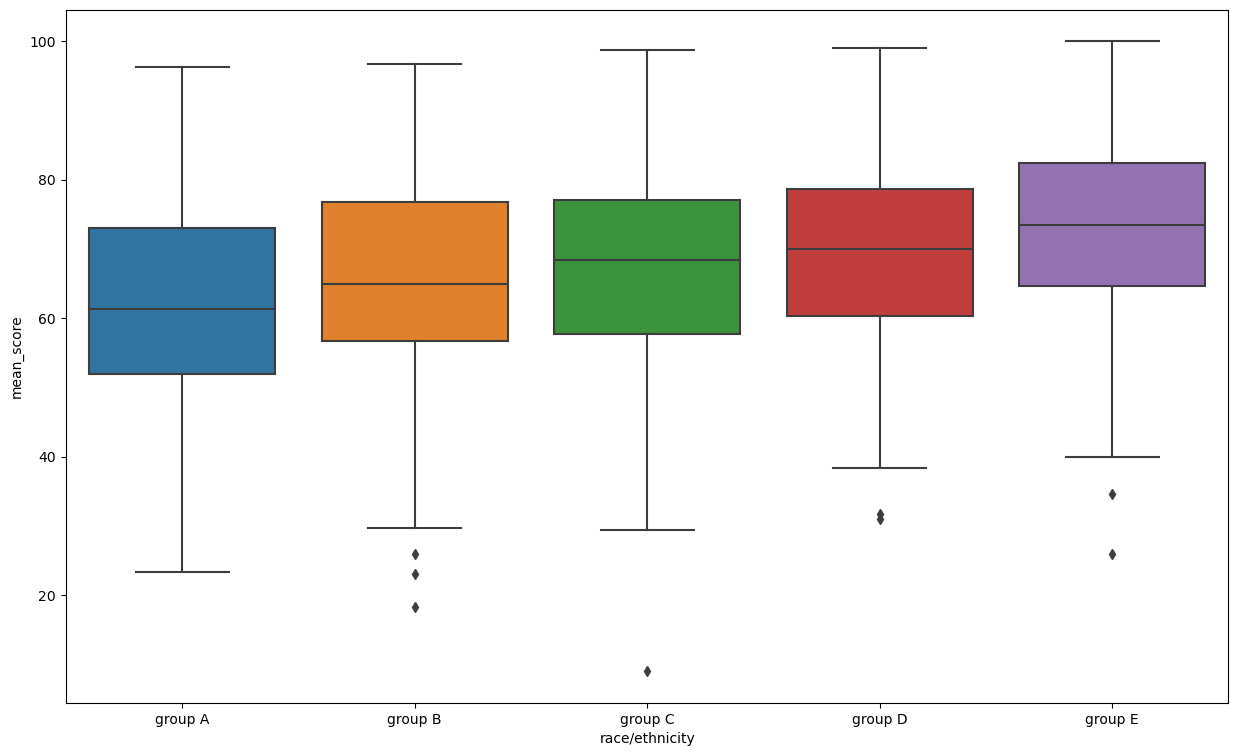

In [11]:
plt.figure(figsize=(15,9))

order = sorted(data['race/ethnicity'].unique())
sns.boxplot(x='race/ethnicity', y='mean_score', data=data, order=order)

<Axes: xlabel='parental level of education', ylabel='mean_score'>

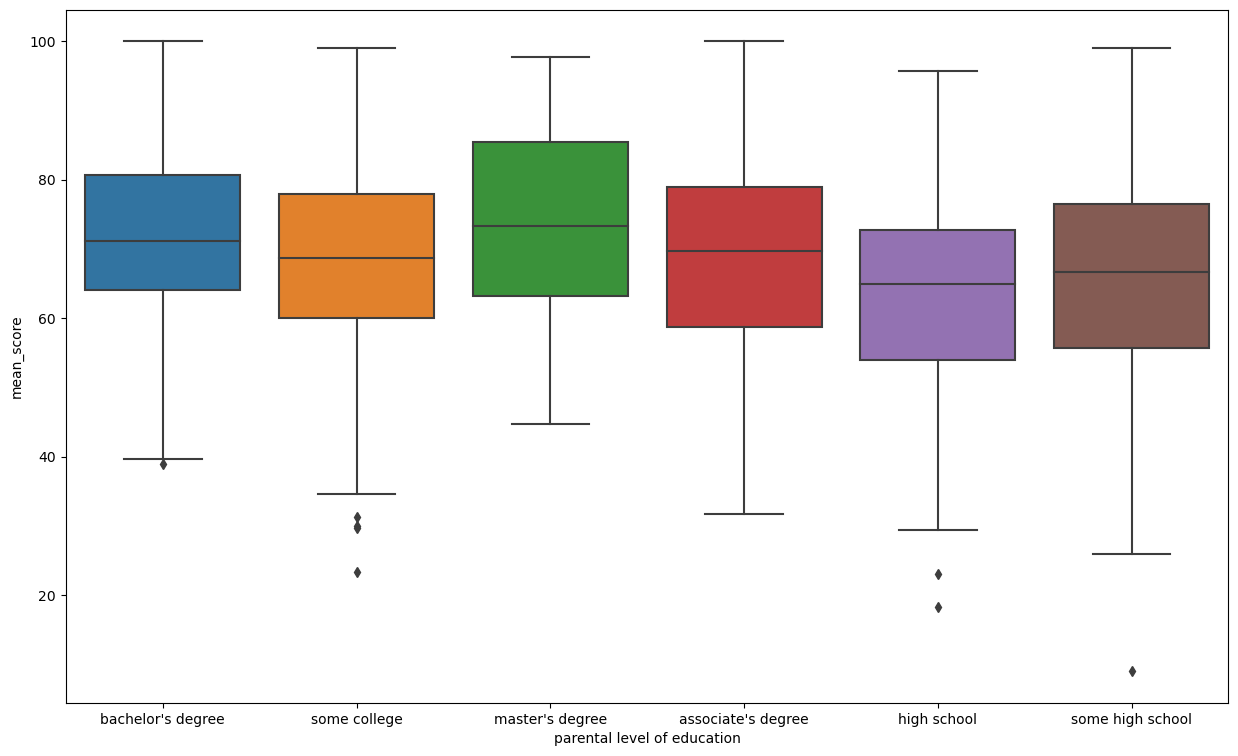

In [12]:
plt.figure(figsize=(15,9))
sns.boxplot(x='parental level of education', y='mean_score', data=data)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x900 with 0 Axes>

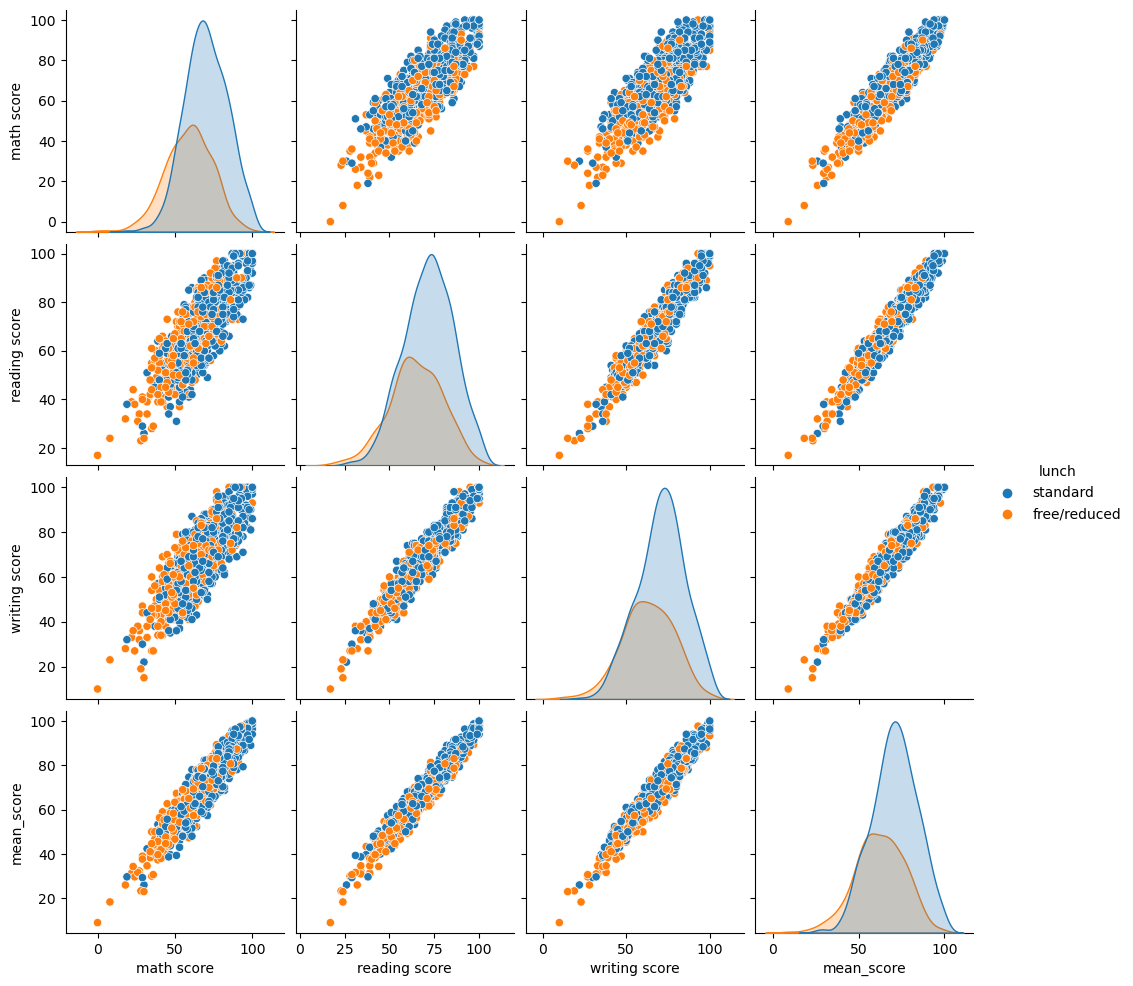

In [13]:
plt.figure(figsize=(20,9))
sns.pairplot(data, hue='lunch')

<Axes: title={'center': 'mean_score'}, xlabel='test preparation course', ylabel='mean_score'>

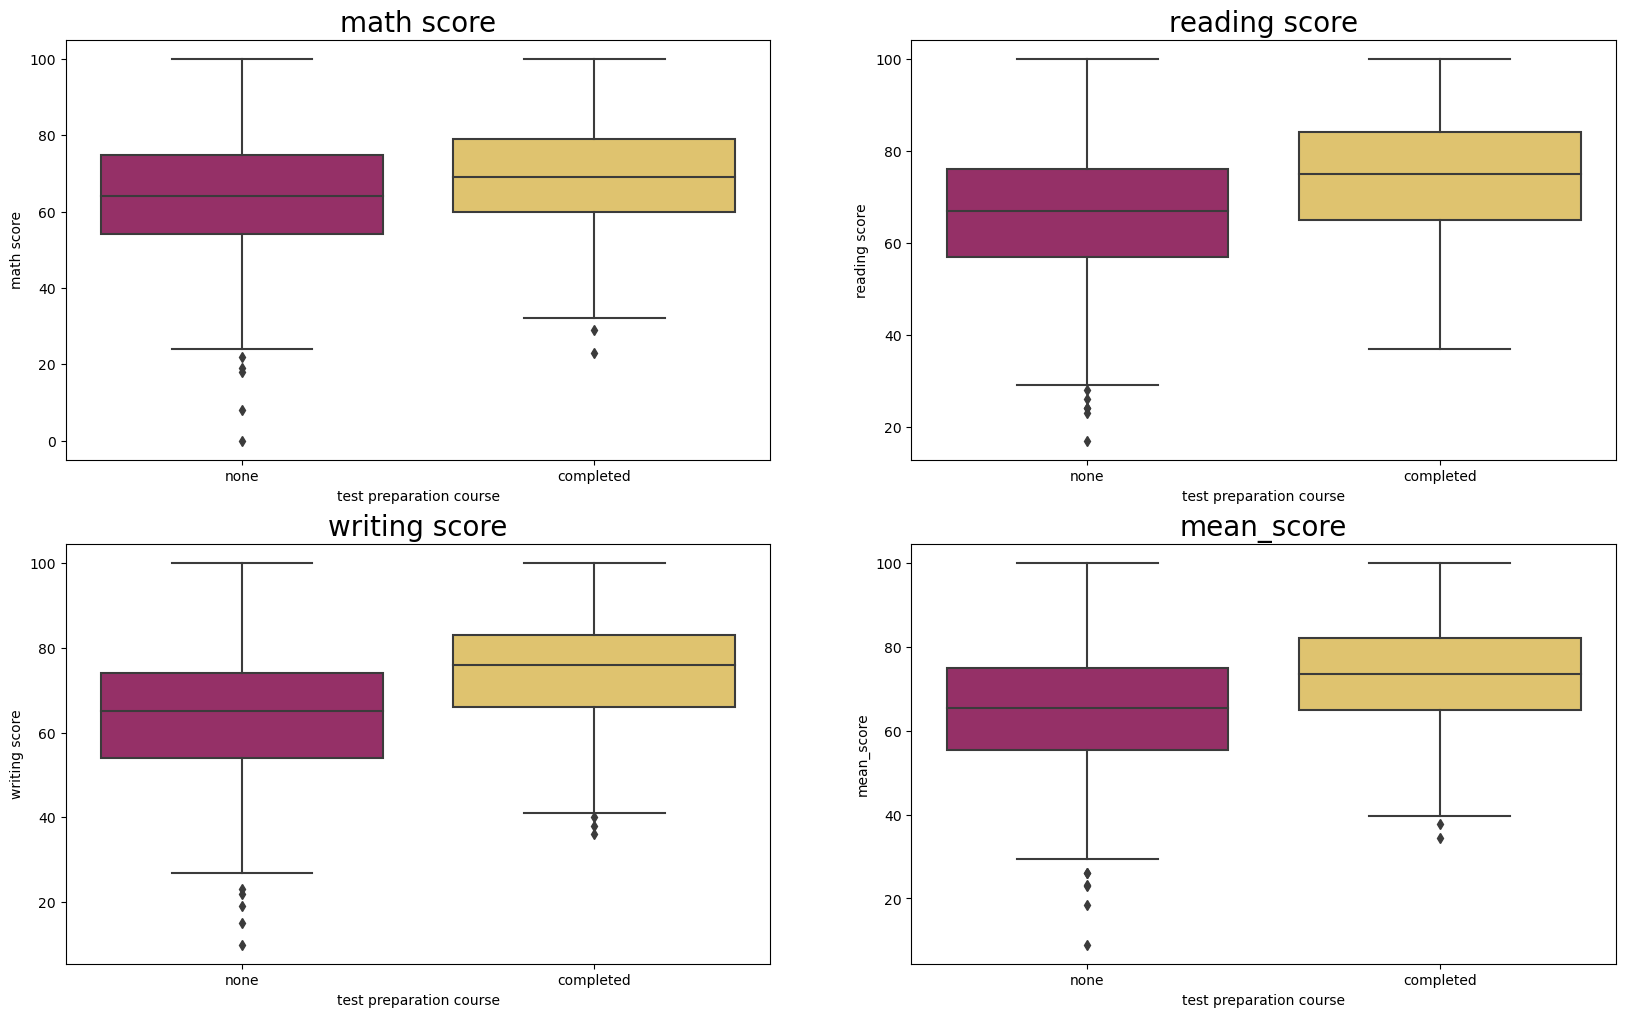

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

colors = ["#A61F69", "#F2CD5C"]
axes[0, 0].set_title('math score', fontsize=20)
sns.boxplot(data=data, x='test preparation course', y='math score', ax=axes[0, 0], palette=colors)
axes[0, 1].set_title('reading score', fontsize=20)
sns.boxplot(data=data, x='test preparation course', y='reading score', ax=axes[0, 1], palette=colors)
axes[1, 0].set_title('writing score', fontsize=20)
sns.boxplot(data=data, x='test preparation course', y="writing score", ax=axes[1, 0], palette=colors)
axes[1, 1].set_title('mean_score', fontsize=20)
sns.boxplot(data=data, x='test preparation course', y='mean_score', ax=axes[1, 1], palette=colors)

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(method='pearson'),annot=True, )

ValueError: could not convert string to float: 'female'

<Figure size 1000x800 with 0 Axes>

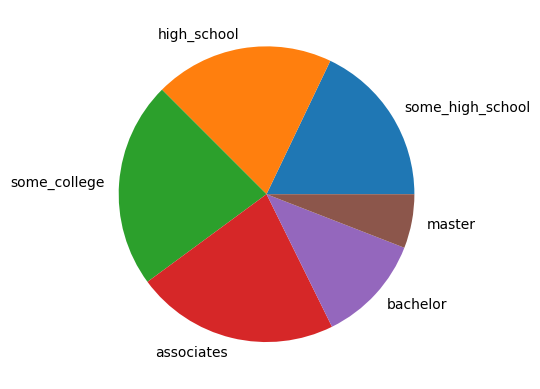

In [20]:
high_school=data.loc[data['parental level of education']=='high school']
associates=data.loc[data['parental level of education']=="associate's degree"]
bachelor=data.loc[data['parental level of education']=="bachelor's degree"]
some_college=data.loc[data['parental level of education']=='some college']
some_high_school=data.loc[data['parental level of education']=='some high school']
master=data.loc[data['parental level of education']=="master's degree"]
parental_education=['some_high_school','high_school','some_college','associates','bachelor','master']
edu_list=[len(some_high_school),len(high_school),len(some_college),len(associates),len(bachelor),len(master)]
plt.pie(edu_list,labels=parental_education)
plt.show()

In [21]:
print(data.columns)

# Update the rubrics and column names based on your actual data
parental_edu_score_rubric = {
    'some high school': 0,
    'high school': 1,
    'some college': 2,
    "associate's degree": 3,
    "bachelor's degree": 4,
    "master's degree": 5
}

race_rubric = {
    'group A': 0,
    'group B': 1,
    'group C': 2,
    "group D": 3,
    "group E": 4,
}

lunch_rubric = {'standard': 1, 'free/reduced': 0}
course_rubric = {'none': 0, 'completed': 1}
gender_rubric = {'female': 0, 'male': 1}

# Assuming the correct column names based on your data
categorical_columns = ['parental level of education', 'lunch', 'test preparation course', 'gender']

# Map the rubrics to the corresponding columns
data['parental_edu'] = data['parental level of education'].map(parental_edu_score_rubric)
data['.lunch'] = data['lunch'].map(lunch_rubric)
data['test_prep'] = data['test preparation course'].map(course_rubric)
data['.gender'] = data['gender'].map(gender_rubric)
data['race'] = data['race/ethnicity'].map(race_rubric)

data.head(20)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'mean_score'],
      dtype='object')


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score,parental_edu,.lunch,test_prep,.gender,race
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,4,1,0,0,1
1,female,group C,some college,standard,completed,69,90,88,82.33,2,1,1,0,2
2,female,group B,master's degree,standard,none,90,95,93,92.67,5,1,0,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,3,0,0,1,0
4,male,group C,some college,standard,none,76,78,75,76.33,2,1,0,1,2
5,female,group B,associate's degree,standard,none,71,83,78,77.33,3,1,0,0,1
6,female,group B,some college,standard,completed,88,95,92,91.67,2,1,1,0,1
7,male,group B,some college,free/reduced,none,40,43,39,40.67,2,0,0,1,1
8,male,group D,high school,free/reduced,completed,64,64,67,65.00,1,0,1,1,3
9,female,group B,high school,free/reduced,none,38,60,50,49.33,1,0,0,0,1


In [22]:
data=data.drop('lunch',axis=1)
data=data.drop('gender',axis=1)
data=data.drop('race/ethnicity',axis=1)
data=data.drop('parental level of education',axis=1)
data=data.drop('test preparation course',axis=1)
data=data.drop('mean_score',axis=1)


In [23]:
data.head(15)

,math score,reading score,writing score,parental_edu,.lunch,test_prep,.gender,race
0,72,72,74,4,1,0,0,1
1,69,90,88,2,1,1,0,2
2,90,95,93,5,1,0,0,1
3,47,57,44,3,0,0,1,0
4,76,78,75,2,1,0,1,2
5,71,83,78,3,1,0,0,1
6,88,95,92,2,1,1,0,1
7,40,43,39,2,0,0,1,1
8,64,64,67,1,0,1,1,3
9,38,60,50,1,0,0,0,1


In [24]:
y = data['math score']
X = data[['parental_edu',
       '.lunch', 'test_prep','.gender','race','reading score',
       'writing score']]

In [25]:
features_to_normalize = ['math score', 'reading score', 'writing score']
data_normalized = data.copy()

scaler = MinMaxScaler()

data_normalized[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

print(data_normalized.head())


   math score  reading score  writing score  parental_edu  .lunch  test_prep  \
0        0.72       0.662651       0.711111             4       1          0   
1        0.69       0.879518       0.866667             2       1          1   
2        0.90       0.939759       0.922222             5       1          0   
3        0.47       0.481928       0.377778             3       0          0   
4        0.76       0.734940       0.722222             2       1          0   

   .gender  race  
0        0     1  
1        0     2  
2        0     1  
3        1     0  
4        1     2  


In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=44,shuffle=True)

In [30]:
print(len(x_train))
print(len(x_test))

800
200


In [31]:
model_1=LinearRegression ()
model_1.fit(x_train,y_train)

LinearRegression()

In [32]:
print(model_1.score(x_train,y_train))

0.866479996969041


In [33]:
print(model_1.score(x_test,y_test))

0.8735112026480298


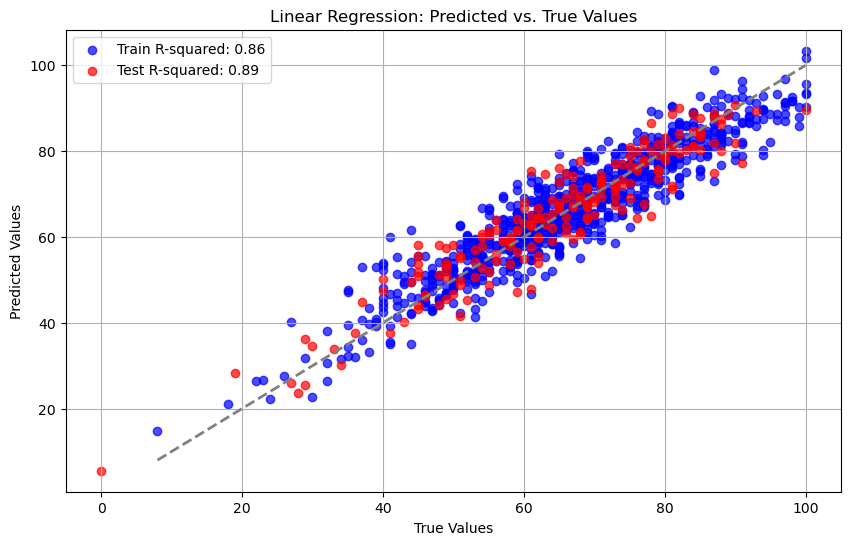

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming X is your feature matrix and y is your target variable for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
linear_regressor = LinearRegression()

# Fit the model to the training data
linear_regressor.fit(X_train, y_train)

# Predict on the training set
y_train_pred = linear_regressor.predict(X_train)

# Predict on the test set
y_test_pred = linear_regressor.predict(X_test)

# Calculate R-squared for training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Plot the predicted vs. true values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, label=f'Train R-squared: {train_r2:.2f}', color='blue', alpha=0.7)
plt.scatter(y_test, y_test_pred, label=f'Test R-squared: {test_r2:.2f}', color='red', alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='gray', linewidth=2)
plt.title('Linear Regression: Predicted vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


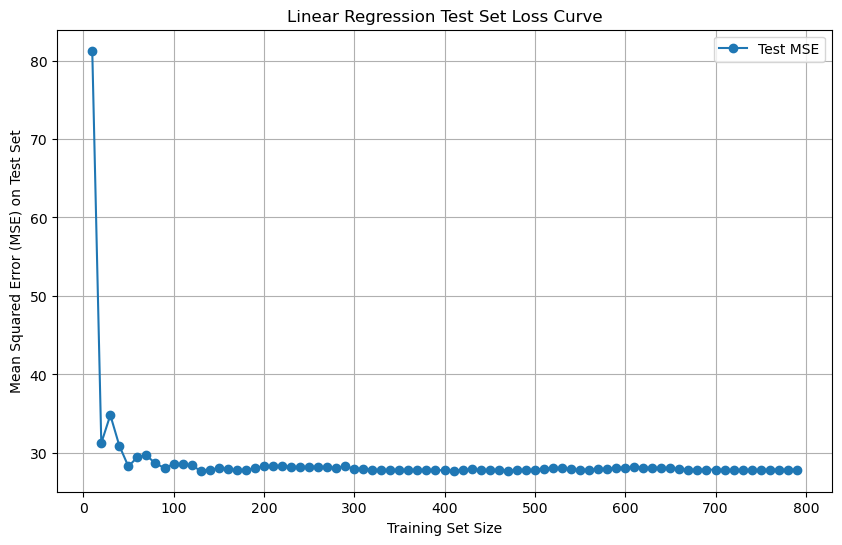

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X is your feature matrix and y is your target variable for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Linear Regression model
linear_regressor = LinearRegression()

# Train the model and collect MSE for test set
train_sizes = np.arange(10, len(X_train), step=10)
test_mse = []

for size in train_sizes:
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)

    # Fit the model to the partial training data
    linear_regressor.fit(X_train_partial, y_train_partial)

    # Predict on the test set
    y_test_pred = linear_regressor.predict(X_test)
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plot the loss curve for the test set
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, test_mse, label='Test MSE', marker='o')
plt.title('Linear Regression Test Set Loss Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE) on Test Set')
plt.legend()
plt.grid(True)
plt.show()
